In [1]:
import numpy as np
from sklearn.svm import SVR 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import pandas as pd 

%matplotlib inline

In [2]:
from pandas_datareader import data as pdr #extract data from internet sources into pandas data frame
import yfinance as yf

yf.pdr_override()
start_date = "2019-02-13"
end_date = "2020-03-20"
stocks = 'NFLX'
df = pdr.get_data_yahoo(stocks, start = start_date, end = end_date)

C:\Users\prasadvk\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


[*********************100%***********************]  1 of 1 completed


In [3]:
# sort by date
df = df.sort_values('Date')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)

df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-13,330.510010,336.420013,307.390015,336.299988,336.299988,9458200
2020-03-16,306.630005,334.350006,294.750000,298.839996,298.839996,10559900
2020-03-17,306.190002,322.899994,290.250000,319.750000,319.750000,10013900
2020-03-18,302.399994,331.579987,300.000000,315.470001,315.470001,12593600
2020-03-19,324.329987,348.510010,316.820007,332.029999,332.029999,10616000


In [19]:
import matplotlib.dates as plt_dates
dates = df.index.map(plt_dates.date2num).to_numpy()
dates = dates.reshape((-1, 1))

In [20]:
prices = df['Adj Close'].to_numpy()

In [21]:
dates_train, dates_test, prices_train, prices_test = train_test_split(dates, prices, test_size=0.1, shuffle=False)

In [22]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma=0.1)
svr_rbf.fit(dates_train, prices_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
prices_test_pred = svr_rbf.predict(dates_test)

In [24]:
dates_test_strings = list(map(lambda x: plt_dates.num2date(int(x[0])), dates_test))

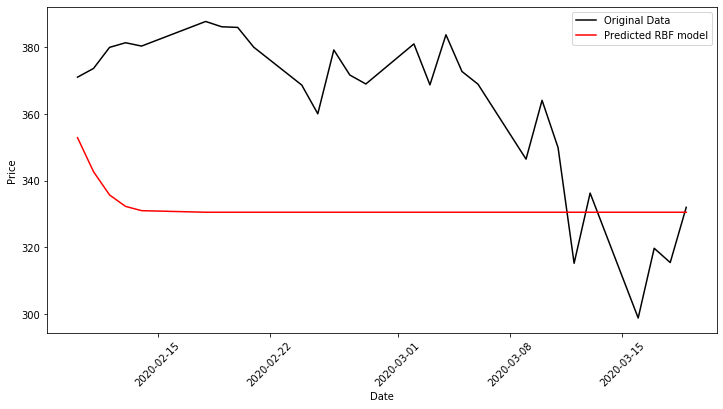

In [25]:
plt.figure(figsize = (12,6))
plt.plot(dates_test_strings, prices_test, color= 'black', label= 'Original Data')
plt.plot(dates_test_strings, prices_test_pred, color= 'red', label= 'Predicted RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [26]:
## RMSE for SVR Model
from sklearn.metrics import mean_squared_error
#Calculate RMSE 
RMSEsvm=mean_squared_error(prices_test, prices_test_pred)
RMSEsvm

1476.3673205031557

In [27]:
dates_train1, dates_test1, prices_train1, prices_test1 = train_test_split(dates, prices, test_size=0.33, shuffle=False)

In [28]:
svr_lin = SVR(kernel= 'linear', C= 1e3)
svr_lin.fit(dates_train1, prices_train1)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [29]:
prices_test_pred1 = svr_rbf.predict(dates_test1)

In [30]:
dates_test_strings = list(map(lambda x: plt_dates.num2date(int(x[0])), dates_test1))

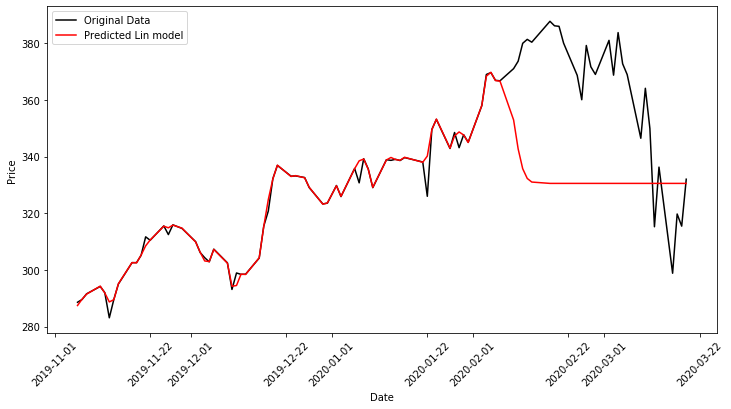

In [31]:
plt.figure(figsize = (12,6))
plt.plot(dates_test_strings, prices_test1, color= 'black', label= 'Original Data')
plt.plot(dates_test_strings, prices_test_pred1, color= 'red', label= 'Predicted Lin model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [32]:
## RMSE for SVR Model
from sklearn.metrics import mean_squared_error
#Calculate RMSE 
RMSEsvm=mean_squared_error(prices_test, prices_test_pred)
RMSEsvm

1476.3673205031557